In [1]:
########PCA############
import pandas as pd

x = pd.read_csv('scenarii_count_vector.csv', sep = ',')
tags = pd.read_csv('tags_vector.csv', sep = ',')

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [3]:
from matplotlib import pyplot as plt

finalDf = pd.concat([principalDf, tags], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['action', 'acteur', 'usecase', 'gestion']
colors = ['r', 'g', 'b', 'gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [4]:
###########ISOMAP##############
import pandas as pd
from sklearn import manifold

df = pd.DataFrame(x)

iso = manifold.Isomap(n_neighbors=30, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()


,Component 1,Component 2
0,1.083937,-0.364654
1,-0.118541,-0.082234
2,0.731366,0.816368
3,-0.224981,0.699350
4,-0.251345,0.903817


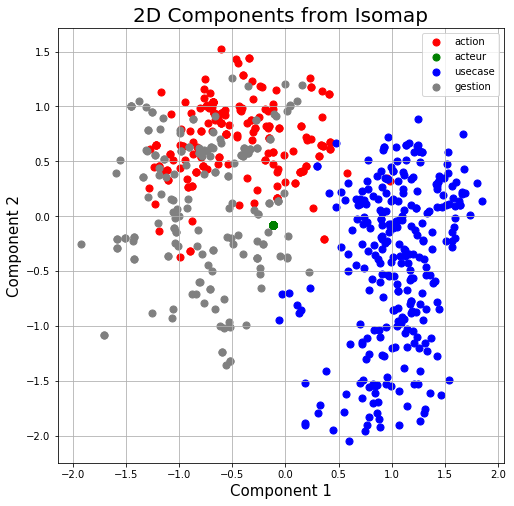

In [5]:
import numpy as np
%matplotlib inline

finalDf = pd.concat([manifold_2D, tags], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2D Components from Isomap', fontsize = 20)

targets = ['action', 'acteur', 'usecase', 'gestion']
colors = ['r', 'g', 'b', 'gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [6]:
########LOCAL LINEAR EMBEDDING#########
n_neighbors = 5

clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard')
X_lle = clf.fit_transform(df)

          0         1    texte
0  0.002087  0.002233  usecase
1  0.001051 -0.000433   acteur
2  0.004484  0.002226    texte
3 -0.004066 -0.005743    texte
4 -0.003313 -0.002098   action


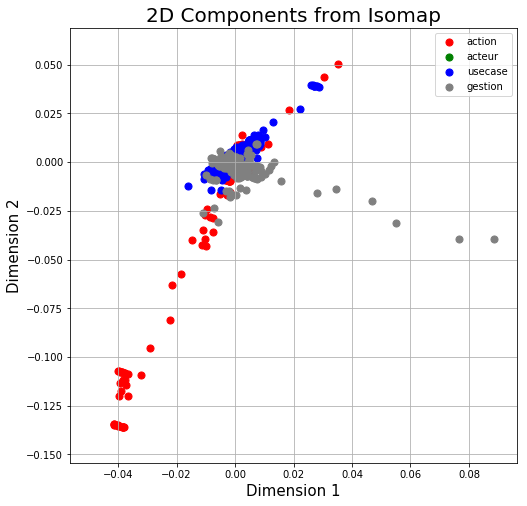

In [7]:
finalDf = pd.concat([pd.DataFrame(X_lle), tags], axis = 1)

print(finalDf.head())
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2D Components from Isomap', fontsize = 20)

targets = ['action', 'acteur', 'usecase', 'gestion']
colors = ['r', 'g', 'b', 'gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [8]:
########SPECTRAL EMBEDDING#########

embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(df)


          0         1    texte
0 -0.082203  0.068189  usecase
1  0.946186 -0.003007   acteur
2 -0.076489  0.095693    texte
3 -0.144348 -0.291230    texte
4 -0.159862 -0.280601   action


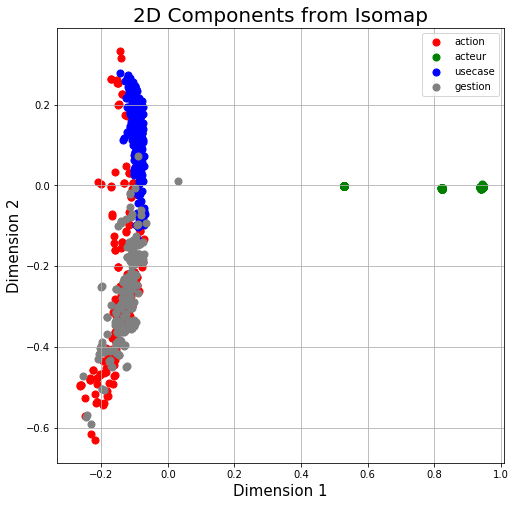

In [9]:
finalDf = pd.concat([pd.DataFrame(X_se), tags], axis = 1)

print(finalDf.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2D Components from Isomap', fontsize = 20)

targets = ['action', 'acteur', 'usecase', 'gestion']
colors = ['r', 'g', 'b', 'gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
#########LDA#########
from sklearn import discriminant_analysis
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(df, tags)

C:\Users\fkafou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fkafou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


            0          1    texte
0   22.835955  23.536081  usecase
1 -159.813354   0.170210   acteur
2   22.743537   0.326813    texte
3   22.742950   0.326831    texte
4   22.893111 -28.183707   action


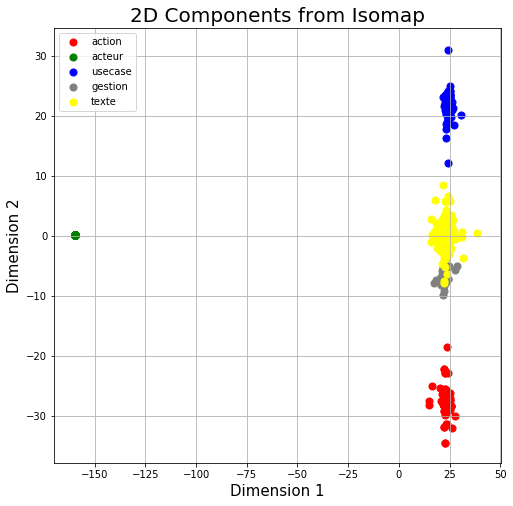

In [11]:
finalDf = pd.concat([pd.DataFrame(X_lda), tags], axis = 1)

print(finalDf.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2D Components from Isomap', fontsize = 20)

targets = ['action', 'acteur', 'usecase', 'gestion', 'texte']
colors = ['r', 'g', 'b', 'gray', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [12]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(df)

            0          1    texte
0  -20.338488  63.167950  usecase
1  113.213303  21.689217   acteur
2   -0.388302  51.804531    texte
3   18.868790 -18.549454    texte
4    4.812325   2.199320   action


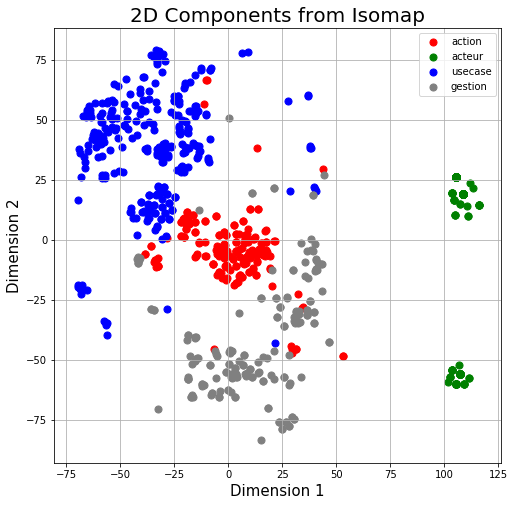

In [13]:
finalDf = pd.concat([pd.DataFrame(X_tsne), tags], axis = 1)

print(finalDf.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2D Components from Isomap', fontsize = 20)

targets = ['action', 'acteur', 'usecase', 'gestion']
colors = ['r', 'g', 'b', 'gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['texte'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()